In [1]:
%matplotlib inline

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, make_circles

from sklearn.svm import LinearSVC, LinearSVR, SVC, OneClassSVM

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsClassifier

# Support Vector Machines

In [3]:
iris_data = load_iris()

In [4]:
iris_attributes, iris_target = iris_data['data'], iris_data['target']

In [5]:
iris_attributes[:5], iris_target[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

<b>SVM classifier</b>

In [6]:
simple_svm = LinearSVC(loss = 'hinge', max_iter = 10000)

In [7]:
simple_svm.fit(iris_attributes, iris_target)

C:\Users\diton\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(loss='hinge', max_iter=10000)

In [8]:
simple_svm.coef_

array([[ 0.3094069 ,  0.42979064, -1.04545607, -0.61783915],
       [ 0.60997751, -1.69786206,  0.45767866, -1.62324733],
       [-1.11573115, -1.26852421,  1.70963636,  2.43560821]])

It is a linear function. 

*Verticle line is not a function.

In [9]:
simple_svm.predict(iris_attributes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
simple_svm.score(iris_attributes, iris_target)

0.94

## Setting C 

Strong regularization

In [11]:
simple_svm_penalty = LinearSVC(C = 1e-5)

In [12]:
simple_svm_penalty.fit(iris_attributes, iris_target)

LinearSVC(C=1e-05)

In [13]:
simple_svm_penalty.coef_

array([[-0.00618899, -0.00165231, -0.00742254, -0.00280001],
       [-0.00480169, -0.00319491, -0.00217729, -0.00075817],
       [-0.00380865, -0.00294014,  0.00018464,  0.00056783]])

In [14]:
simple_svm_penalty.score(iris_attributes, iris_target)

0.3333333333333333

The model above doesn't care about the data.

Weak regularization

In [15]:
simple_svm_penalty = LinearSVC(C = 1e-2)

In [16]:
simple_svm_penalty.fit(iris_attributes, iris_target)

LinearSVC(C=0.01)

In [17]:
simple_svm_penalty.coef_

array([[ 0.07905575,  0.28624194, -0.43700036, -0.19187972],
       [ 0.01499289, -0.25530531,  0.11715578, -0.10162956],
       [-0.24018788, -0.18099479,  0.34400786,  0.30562128]])

In [18]:
simple_svm_penalty.score(iris_attributes, iris_target)

0.8133333333333334

<b>Logistic Regression model</b>

In [19]:
log_reg_model = LogisticRegression(C = 1e-2)

In [20]:
log_reg_model.fit(iris_attributes, iris_target)

LogisticRegression(C=0.01)

In [21]:
log_reg_model.coef_

array([[-0.13677373,  0.09609099, -0.43483295, -0.17832754],
       [-0.00099515, -0.10240436,  0.08668986, -0.00339625],
       [ 0.13776888,  0.00631337,  0.34814309,  0.18172379]])

In [22]:
log_reg_model.score(iris_attributes, iris_target)

0.8733333333333333

the algorithms we learn == the classes we have

First line -> is this class 0 -> Yes, No -> is this class 1 -> Yes, NO, etc

<b>SVM models</b> -> High complexity O(m * n^2) to O(m * n^3) m - number of features, n - number of samples; Feasable for max 10^5 samples; Very slow on big datasets.

## SVM Regressor

In [23]:
svr_model = LinearSVR(C = 1e-3)

In [24]:
first_attribute = iris_attributes[:, 0].reshape(-1, 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(first_attribute, iris_target, test_size = 0.2, random_state = 42)

In [26]:
svr_model.fit(X_train, y_train)

LinearSVR(C=0.001)

In [27]:
svr_model.coef_

array([0.15578521])

In [28]:
svr_model.predict(X_test)

array([0.96884296, 0.90652888, 1.21809929, 0.95326444, 1.0778926 ,
       0.85979332, 0.89095036, 1.09347112, 0.98442148, 0.9221074 ,
       1.03115704, 0.76632219, 0.87537184, 0.78190071, 0.81305775,
       1.        , 1.03115704, 0.89095036, 0.90652888, 1.01557852,
       0.75074367, 0.96884296, 0.79747923, 1.01557852, 1.24925633,
       1.06231408, 1.06231408, 1.0778926 , 0.76632219, 0.76632219])

In [29]:
y_pred = svr_model.predict(X_test)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
mae, mse, r2

(0.6273002375686082, 0.5364492771288176, 0.23242551762172348)

<b>Using PolynomialFeatures</b>

In [32]:
simple_svm = LinearSVC()

In [33]:
simple_svm = LinearSVC(C = 1e-3) # C = 1e-3 for stronger regularization; a simpler model

In [34]:
simple_svm.fit(iris_attributes, iris_target)

LinearSVC(C=0.001)

In [35]:
simple_svm.coef_

array([[ 0.01439214,  0.10002878, -0.18606391, -0.08267647],
       [-0.03771444, -0.07470797,  0.03917557,  0.00300156],
       [-0.07744732, -0.09388809,  0.11991599,  0.07658253]])

In [36]:
simple_svm.predict(iris_attributes) # one of the classes is omitted entirely

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
simple_svm.score(iris_attributes, iris_target)

0.6666666666666666

<b>poly</b>

In [38]:
poly_attributes = PolynomialFeatures(degree = 3).fit_transform(iris_attributes)

In [39]:
poly_svc = LinearSVC(C = 1e-3)

In [40]:
poly_svc.fit(poly_attributes, iris_target)

LinearSVC(C=0.001)

In [41]:
poly_svc.score(poly_attributes, iris_target)

0.98

More features lead to a better-learned model.

In [42]:
poly_svc.predict(poly_attributes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We have a simpler model with more complex features.

Cover's theorem -> for high-dimensional data we can use a simplier algorithm

In [43]:
iris_attributes.shape, poly_attributes.shape

((150, 4), (150, 35))

<b>The dimensionality can be increased automatically.</b>

More dimensions -> a slower algorithm.

<b>Kernal function</b> -> a scalar product in many dimensions

In [44]:
circles_attr, circles_tagret = make_circles(noise = 0.1, factor = 0.5, n_samples = 200)

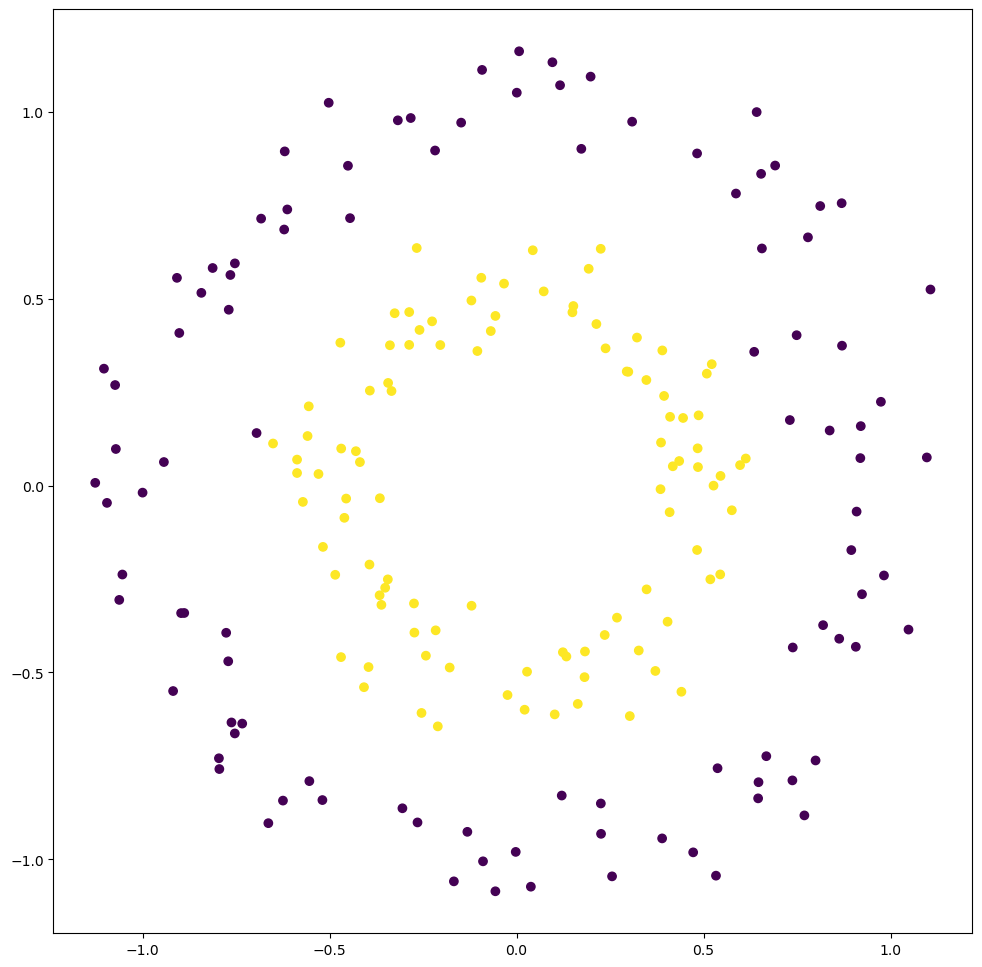

In [45]:
plt.figure(figsize = (16, 12))
plt.scatter(circles_attr[:, 0], circles_attr[:, 1], c = circles_tagret)
plt.gca().set_aspect('equal')

In [46]:
circles_scm = LinearSVC()

In [47]:
circles_scm.fit(circles_attr, circles_tagret)

LinearSVC()

In [48]:
circles_scm.score(circles_attr, circles_tagret)

0.5

The linear model does not work here.

In [49]:
PolynomialFeatures(degree = 2).fit_transform(circles_attr)

array([[ 1.        ,  0.30885869,  0.9730863 ,  0.09539369,  0.30054616,
         0.94689694],
       [ 1.        , -0.46075687, -0.08641224,  0.21229689,  0.03981503,
         0.00746708],
       [ 1.        ,  0.22489352,  0.63305583,  0.05057709,  0.14237015,
         0.40075968],
       ...,
       [ 1.        ,  0.58656907,  0.78086679,  0.34406327,  0.4580323 ,
         0.60975294],
       [ 1.        , -0.69558737,  0.14031285,  0.48384178, -0.09759985,
         0.0196877 ],
       [ 1.        ,  0.10180373, -0.61217408,  0.010364  , -0.0623216 ,
         0.3747571 ]])

In [50]:
circles_attr_poly = PolynomialFeatures(degree = 2).fit_transform(circles_attr)

In [51]:
circles_scm.fit(circles_attr_poly, circles_tagret)

LinearSVC()

In [52]:
circles_scm.score(circles_attr_poly, circles_tagret)

0.99

In [53]:
circles_attr_poly.shape

(200, 6)

In [54]:
PolynomialFeatures(degree = 2).fit(circles_attr).get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

This makes a projection from 2D to 3D.

<b>Using kernels</b>

'poly' kernel

In [55]:
circles_svm_kernal = SVC(kernel = 'poly', degree = 2) # degree is used only with 'poly'

In [56]:
circles_svm_kernal.fit(circles_attr, circles_tagret)

SVC(degree=2, kernel='poly')

In [57]:
circles_svm_kernal.score(circles_attr, circles_tagret)

0.985

The same result as above.

rbf kernel

![Radial basis function kernel](rbf.png)

'gamma' defines the field of influence of a support vector

In [58]:
circles_svm_kernal = SVC(kernel = 'rbf', gamma = 0.01) # small gamma -> small overfitting, strong regularization -> simpler algorithm; big gamma -> weak regularization

samaller gamma -> accuracy drop; big gamma -> the algorithm overfits

In [59]:
circles_svm_kernal.fit(circles_attr, circles_tagret)

SVC(gamma=0.01)

In [60]:
circles_svm_kernal.score(circles_attr, circles_tagret)

0.69

In [61]:
# auto is calculate as 1 / number of features
circles_svm_kernal = SVC(kernel = 'rbf', gamma = 'auto') 

In [62]:
circles_svm_kernal.fit(circles_attr, circles_tagret)

SVC(gamma='auto')

In [63]:
circles_svm_kernal.score(circles_attr, circles_tagret)

0.99

If we have enough meaningful featitres, the kernel doesn't matter.

The kernel function is crucial because it helps transform data into a higher-dimensional space, making it easier to classify non-linearly separable data. However, if the features are already highly informative and meaningful, the need for complex kernel functions like the RBF kernel may decrease, because simpler models (such as linear kernels) could work well enough.

'poly' and 'rbf' do not have coef_

# k-Nearest Neighbors

Instance-based learning algorithms (like k-nearest neighbors) make decisions based on specific instances of the training data. They do not build a model explicitly but instead "memorize" the training instances and compare new data points to those instances at prediction time.

kNN is easy to done. It is good to fill missing data.

In [64]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [65]:
knn.fit(circles_attr, circles_tagret)

KNeighborsClassifier()

In [66]:
knn.score(circles_attr, circles_tagret)

0.995

In [67]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [68]:
knn.fit(circles_attr[:-50], circles_tagret[:-50])

KNeighborsClassifier()

In [69]:
knn.score(circles_attr[-50:], circles_tagret[-50:])

0.98

n_neighbors = 1 is a specific case; voronoi tesellation

In [70]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [71]:
knn.fit(circles_attr, circles_tagret)

KNeighborsClassifier(n_neighbors=1)

In [72]:
knn.score(circles_attr, circles_tagret)

1.0

# Anomaly detection

The dataset used below was downloaded by here: https://www.kaggle.com/datasets/spacemod/pulsar-dataset

In [73]:
pulsar_data = pd.read_csv("pulsar_stars.csv")

In [74]:
pulsar_data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [75]:
pulsar_data.target_class.value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [76]:
pulsar_data.target_class.value_counts(normalize = True)

target_class
0    0.908426
1    0.091574
Name: proportion, dtype: float64

In [81]:
pulsar_attributes_train, pulsar_attributes_tets, pulsar_target_train, pulsar_target_test = train_test_split(
    pulsar_data.drop(columns = 'target_class'), 
    pulsar_data.target_class, 
    test_size = 0.25,
    stratify = pulsar_data.target_class
)

In [82]:
pulsar_attributes_train.shape, pulsar_attributes_tets.shape, pulsar_target_train.shape, pulsar_target_test.shape

((13423, 8), (4475, 8), (13423,), (4475,))

<b>pulsar SVC</b>

In [83]:
pulsar_svm = SVC(kernel = 'rbf', gamma = 2)

In [84]:
pulsar_svm.fit(pulsar_attributes_train, pulsar_target_train)

SVC(gamma=2)

In [86]:
pulsar_svm.score(pulsar_attributes_tets, pulsar_target_test)

0.9083798882681564

<b>pulsar LinearSVC</b>

In [88]:
pulsar_linear_svm = LinearSVC()

In [89]:
pulsar_linear_svm.fit(pulsar_attributes_train, pulsar_target_train)

LinearSVC()

In [90]:
pulsar_linear_svm.score(pulsar_attributes_train, pulsar_target_train)

0.9780972956865083

In [91]:
pulsar_linear_svm.score(pulsar_attributes_tets, pulsar_target_test)

0.9785474860335196

In [92]:
pulsar_linear_svm.coef_

array([[ 7.46281982e-03, -7.15533529e-03,  1.50250914e+00,
        -1.25398584e-01, -5.56101108e-03,  9.32575342e-03,
        -1.69702900e-02,  1.37765585e-04]])

Anomalies occur very rarely and are unexpected.

In [94]:
detector = OneClassSVM()

In [95]:
detector.fit(pulsar_attributes_train)

OneClassSVM()

In [96]:
detector.predict(pulsar_attributes_train)

array([ 1,  1, -1, ..., -1, -1,  1], dtype=int64)

<b>nu</b>

In [97]:
detector_nu = OneClassSVM(nu = 0.95)

In [98]:
detector_nu.fit(pulsar_attributes_train)

OneClassSVM(nu=0.95)

In [99]:
detector_nu.predict(pulsar_attributes_train)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)